# Heart Disease EDA and Prediction -- Decision Tree

        By: Samuel Kollie (Sam)

#### Overview

Data taken from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. As a backdrop, the World Health Organization (WHO) has estimated that 12 million deaths occur worldwide, every year due to Heart diseases. The United States and other developed countries account for half of these deaths relating to cardio vascular diseases. Therefore, early prognosis of cardiovascular diseases can help or aid in making decisions on lifestyle changes especially in high risk patients and in turn reduce the complications. 

#### Objective

This study/research addresses the most relevant risk factors of heart disease as well as predict risks using logistic regression.

1. **male**: 0 = Female; 1 = Male
2. **age**: Age at exam time.
3. **education**: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = College
4. **currentSmoker**: 0 = nonsmoker; 1 = smoker
5. **cigsPerDay**: number of cigarettes smoked per day (estimated average)
6. **BPMeds**: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
7. **prevalentStroke**: 0 = Stroke not prevalent in family history; 1 = Stroke prevalent in family history
8. **prevalentHyp**: 0 = Hypertension not prevalent in family history; 1 = Hypertension prevalent in family history
9. **diabetes**: 0 = No; 1 = Yes
10. **totChol**: total cholesterol (mg/dL)
11. **sysBP**: systolic blood pressure (mmHg)
12. **diaBP**: diastolic blood pressure (mmHg)
13. **BMI**: BodyMass Index calculated as: Weight (kg) / Height(meter-squared)
14. **heartRate**: Beats/Min (Ventricular)
15. **glucose**: total glucose mg/dL
16. **TenYearCHD**: 0 = Patient doesn’t have 10-year risk of future coronary heart disease; 1 = Patient has 10-year risk of future coronary heart disease

# Import software libraries

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

# Manage Directory

In [170]:
# Get working directory

#import os
#os.getcwd()

In [171]:
# Change or Set Current Working Directory

#import os
# os.chdir('C:\Users\YOURUSERID\Downloads') - for windows, change \ to \\

#os.chdir('C:\\Users\\XXXXXX\\Downloads')

In [172]:
# Get working directory

#import os
#os.getcwd()

# Data Loading and Preparation

In [24]:
heart_df = pd.read_csv("FraminghamTown_Massachusetts_ cardiovascular_data.csv") 

heart_df.head()

,male,age,Education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

###### Demographic: 

sex: male or female: (Nominal/categorical)

age: age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

###### Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal/categorical)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

###### Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

###### Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

###### Predict variable (desired target or response variable):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [25]:
# dropping a column

heart_df.drop(['Education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
# 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

heart_df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [27]:
# print(df)

heart_df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [28]:
#The unique element present in all the categorical features
col=heart_df[['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']]
for i in col:
    print(f'{i}: unique elements | {col[i].unique()}')

male: unique elements | [1 0]
currentSmoker: unique elements | [0 1]
BPMeds: unique elements | [ 0.  1. nan]
prevalentStroke: unique elements | [0 1]
prevalentHyp: unique elements | [0 1]
diabetes: unique elements | [0 1]
TenYearCHD: unique elements | [0 1]


In [29]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [30]:
# finding nulls

heart_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [31]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values are ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values are  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [32]:
# since we can't average out BPMeds to use the mean, we will drop the 12% of the missing data within the dataset

heart_df.dropna(axis=0,inplace=True)

In [33]:
heart_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Exploratory Analysis

<ipython-input-34-13521da4b82b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data["Education"], rotation=40)


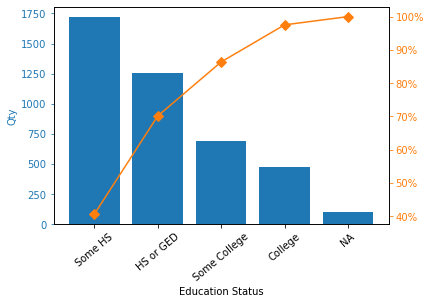

In [34]:
# pareto chart

from matplotlib.ticker import PercentFormatter
data = pd.DataFrame({'Education': [1720, 1253, 689, 473, 105]})
data.index = ['Some HS', 'HS or GED', 'Some College', 'College', 'NA']
data = data.sort_values(by='Education', ascending=False)
data["cumpercentage"] = data["Education"].cumsum()/data["Education"].sum()* 100
fig, ax1 = plt.subplots()
ax1.bar(data.index, data["Education"], color="C0")
ax1.set_ylabel("Qty", color="C0")
ax1.tick_params(axis="y", colors="C0")
ax1.set_xlabel("Education Status")
ax1.set_xticklabels(data["Education"], rotation=40)
ax2 = ax1.twinx()
ax2.plot(data.index, data["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [92]:
df = pd.read_csv("FraminghamTown_Massachusetts_ cardiovascular_data.csv") 

df.head(2)

,male,age,Education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [96]:
df.dropna(axis=0,inplace=True)

#### Stacked Bar

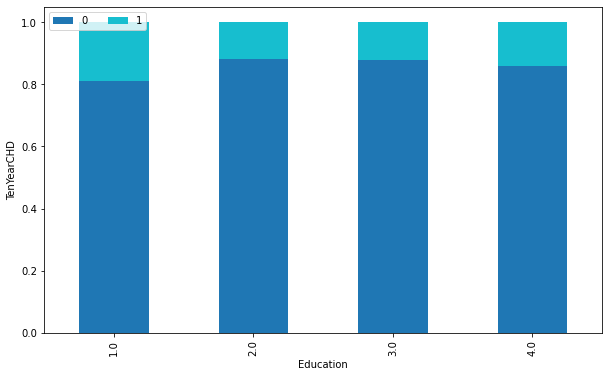

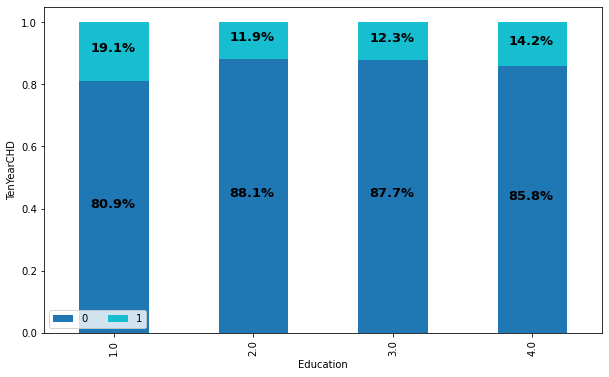

In [97]:
# 1 ~ "Some HS", 
# 2 ~ "HS or GED", 
# 3 ~ "Some College", 
# 4 ~ "College"

cross_tab_prop = pd.crosstab(index=df['Education'],
                             columns=df['TenYearCHD'],
                             normalize="index")
cross_tab = pd.crosstab(index=df['Education'],
                        columns=df['TenYearCHD'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education")
plt.ylabel("TenYearCHD")
plt.show()
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Education")
plt.ylabel("TenYearCHD")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=13,
                 fontweight="bold")

plt.show()

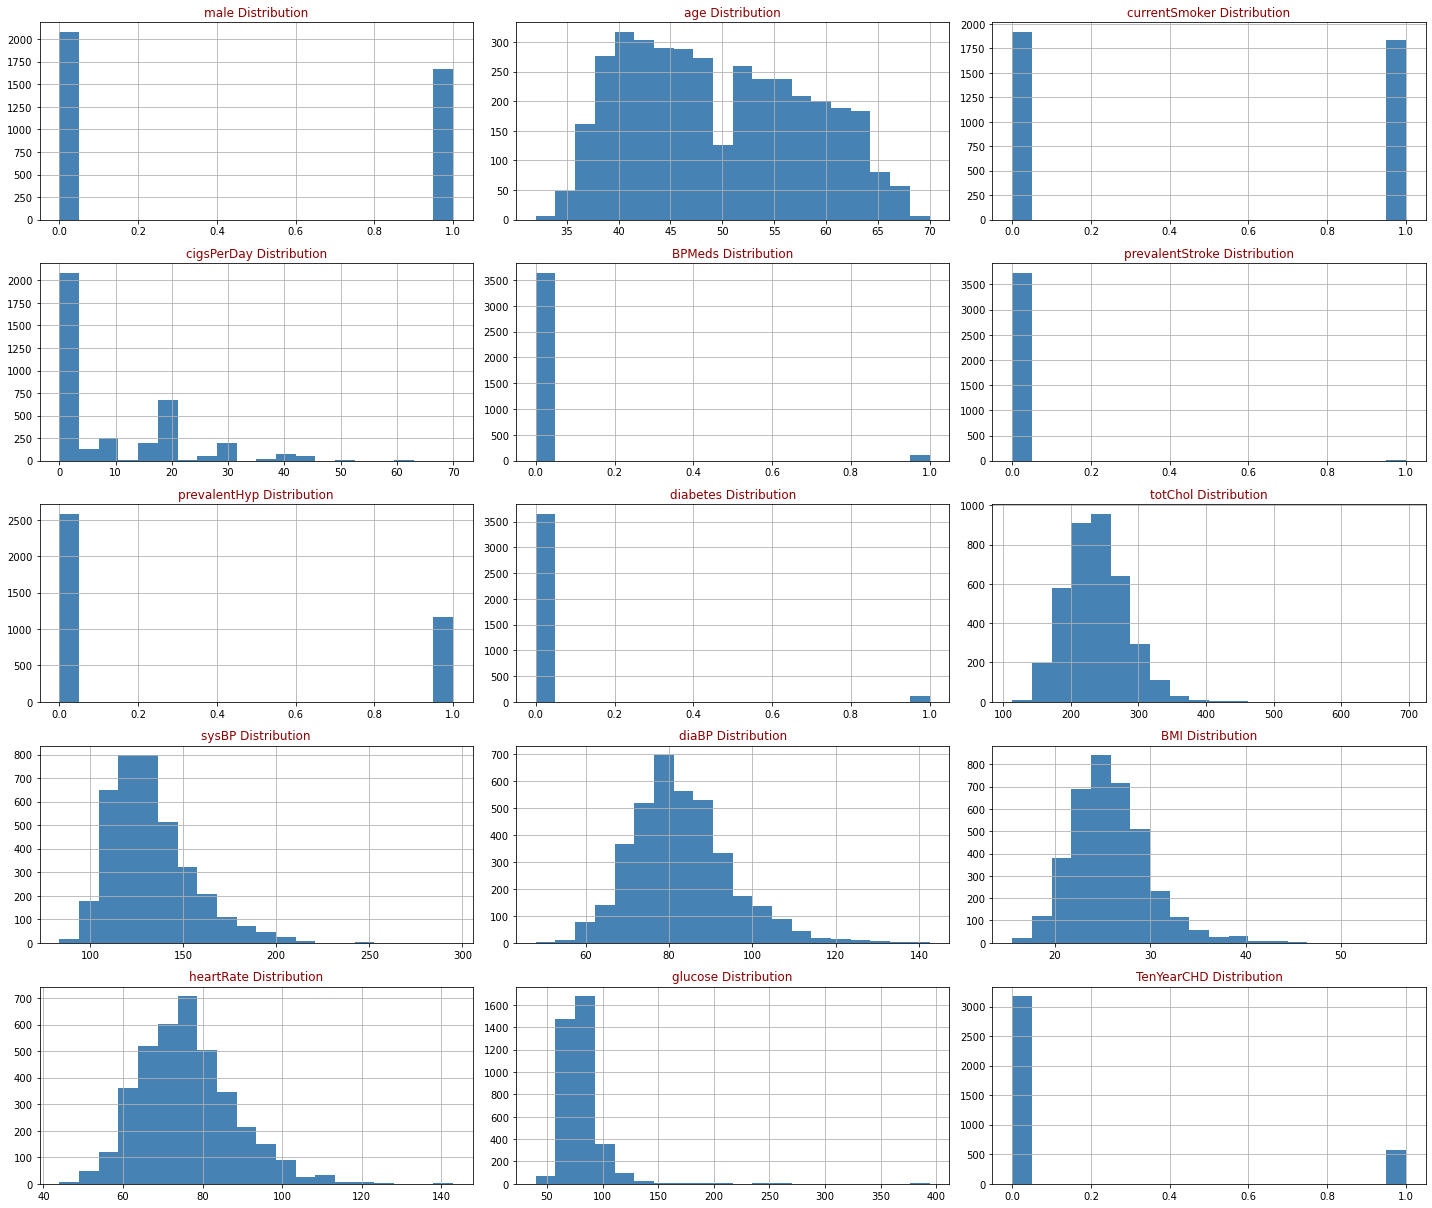

In [118]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='steelblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)
# also can use midnightblue, skyblue

In [31]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

# Correlation

<AxesSubplot:>

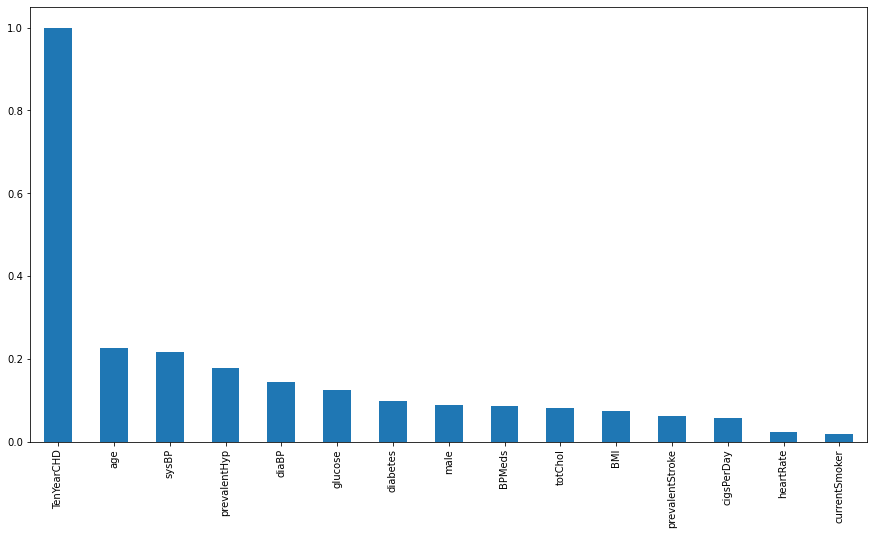

In [41]:
#sn.pairplot(data=heart_df)

#Get Correlation of "stroke" with other variables:

plt.figure(figsize=(15,8))
heart_df.corr()['TenYearCHD'].sort_values(ascending = False).plot(kind='bar')

In [42]:
cor = heart_df.corr()

cor

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369
sysBP,-0.035879,0.394053,-0.130281,-0.088797,0.254194,0.057000,0.696656,0.111265,0.208734,1.000000,0.783952,0.326906,0.182155,0.140573,0.216374


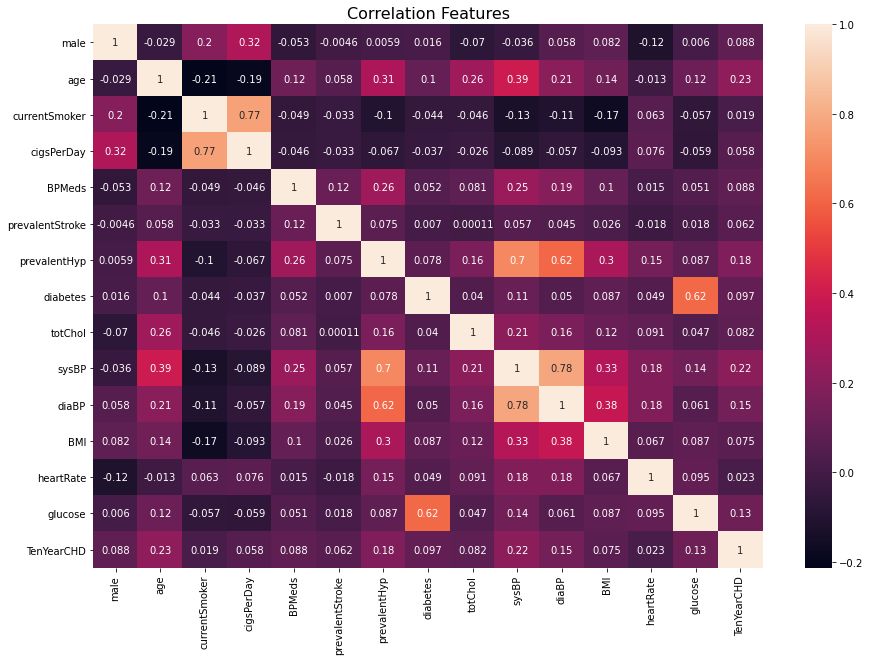

In [44]:
import seaborn as sns

plt.figure(figsize = (15,10))
sns.heatmap(heart_df.corr(), annot = True )
plt.title('Correlation Features', size = 16)
plt.show()

# Predictive Modelling

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [36]:
# Selecting columns I am interested in
columns = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
heart_df = heart_df.loc[:, columns]
heart_df.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [37]:
heart_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [38]:
# Note: DecisionTreeClassifier does not accept missing values encoded as NaN natively.

In [158]:
features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = heart_df.loc[:, features] # independent variables
y = heart_df.loc[:, ['TenYearCHD']] # response/target variable

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, train_size = .8)

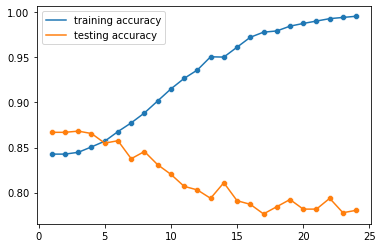

In [160]:
depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
        
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [161]:
# This model indicates overfitting because training accuracy is good and the testing accuracy is decreased.
# This model indicates underfitting because training accuracy and testing accuracy are both decreases.

In [162]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)

This is the best depth for Decision Tree Classifier:  3 
Accuracy score is:  0.8681757656458056


In [163]:
# Inserting image from Downloads folder.

#from IPython import display

#display.Image("modelfitting.png")

# Credit: Kaggle

### HyperParam Tuning

In [164]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1234)

In [165]:
hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4], # [2, 4]
    'min_samples_leaf': [3, 5],
    'class_weight': ['list', 'dict', 'balanced'],
    'random_state': [1234]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 2),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.7923728813559322
best param {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3, 'random_state': 1234, 'splitter': 'best'}


### Between Before & After Tuning

 -- Using Decision Tree Classifier

In [166]:
tree.fit(X_train, y_train)
tree_recall = (recall_score(y_test, tree.predict(X_test)))

grid.best_estimator_.fit(X_train, y_train)
grid_recall = (recall_score(y_test, grid.predict(X_test)))

score_list = [tree_recall, grid_recall]
method_name = ['Decision Tree Classifier Before Tuning', 'Decision Tree Classifier After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Decision Tree Classifier Before Tuning,0.01
1,Decision Tree Classifier After Tuning,0.76


### Plotting Decision Tree Classifier

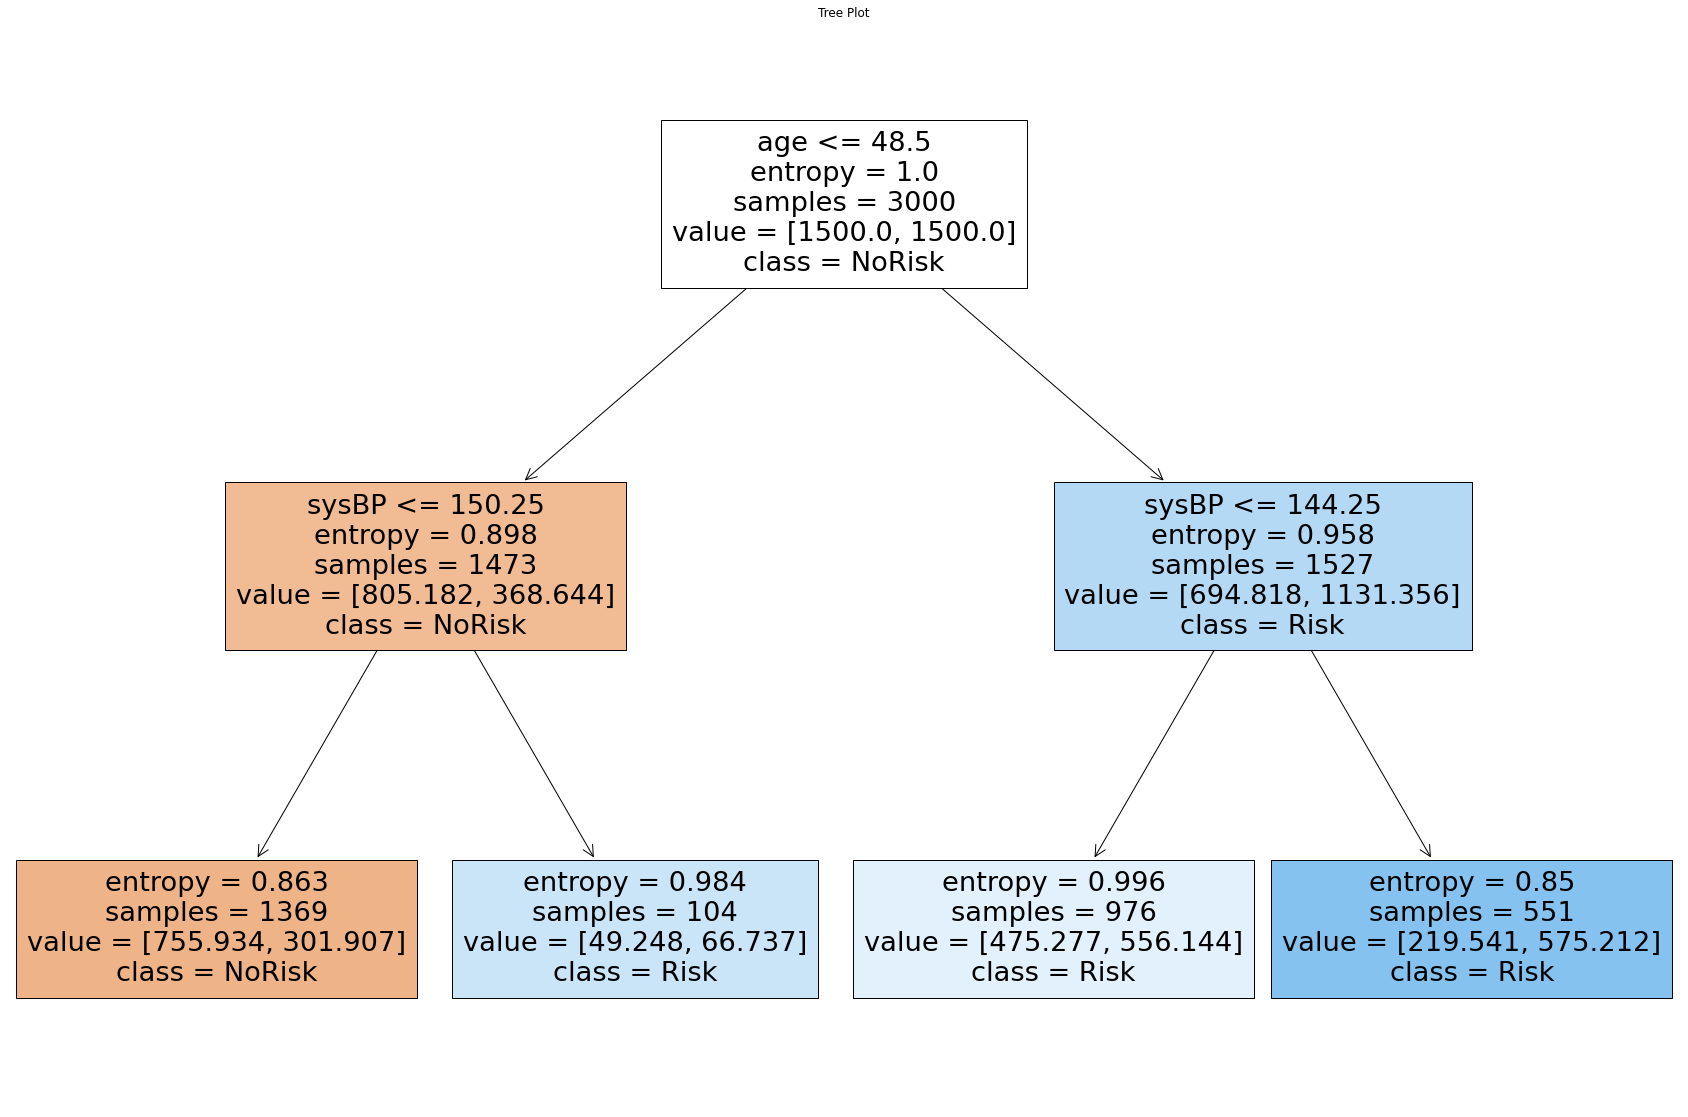

In [167]:
# TenYearCHD: 0 = Patient doesn’t have 10-year risk of future coronary heart disease; 1 = Patient has 10-year risk of future coronary heart disease

plt.figure(figsize=(30,20))
plot_tree(grid.best_estimator_, feature_names = list(X), class_names = ['NoRisk','Risk'], filled = True)
plt.title('Tree Plot')
plt.show()

# decision tree:

# gini purity: goes from 0 to 1. 

# values are the number of classificatiosn in the node (is present or not present)
# class: tels us what categority has the majority 

# based on the data at hand and based of the multiple variables like age, sysBP... from a multiviriate standpoint and not from a univriate standpoint 

In [168]:
importance_table = pd.DataFrame({
    'imp': grid.best_estimator_.feature_importances_
}, index = X.columns)
importance_table.sort_values('imp', ascending = False)

,imp
age,0.723907
sysBP,0.276093
male,0.000000
currentSmoker,0.000000
cigsPerDay,0.000000
BPMeds,0.000000
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,0.000000


<AxesSubplot:>

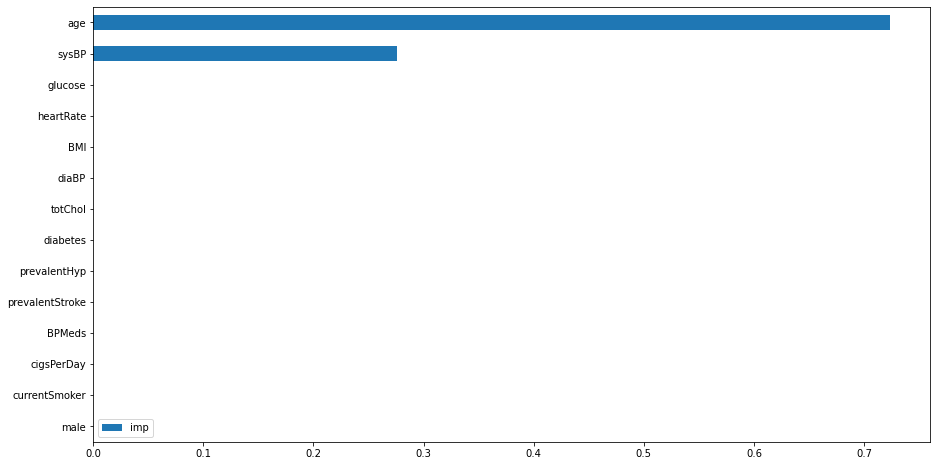

In [104]:
importance_table.sort_values('imp', ascending = True).plot(kind = 'barh', figsize = (15,8))

### Unrelated Power BI Dashbord

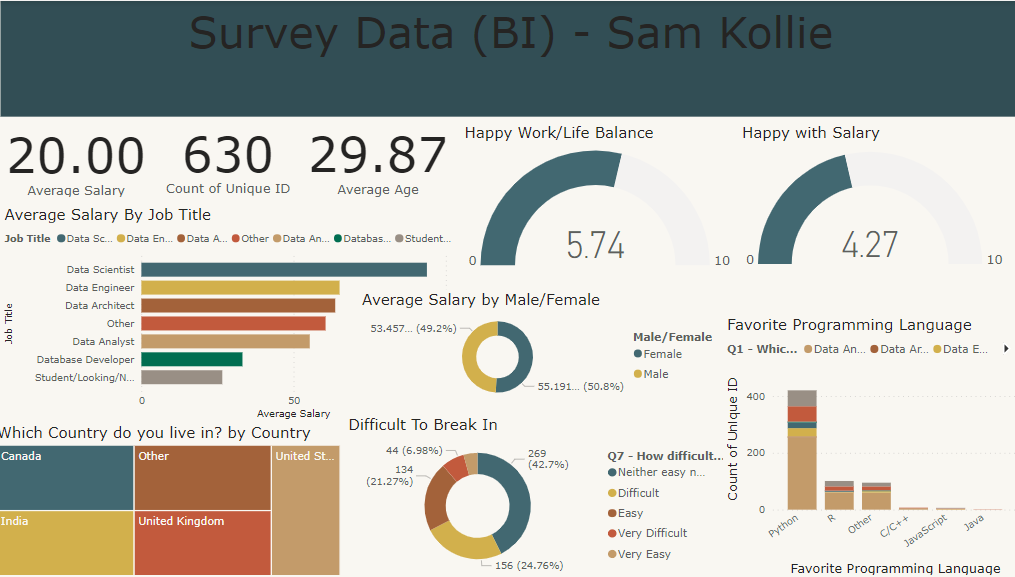

In [169]:
# Inserting image from Downloads folder.

from IPython import display

display.Image("PowerBISurveyData.png")